In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats
import math
import numpy as np

data = pd.read_csv('moore.1.csv', sep=',')
data

,year,n_transistors
0,1971,2300
1,1972,3500
2,1973,2500
3,1974,4100
4,1974,4500
...,...,...
124,2018,8876000000
125,2018,5500000000
126,2018,9000000000
127,2018,6900000000


# A
# Nuage de points

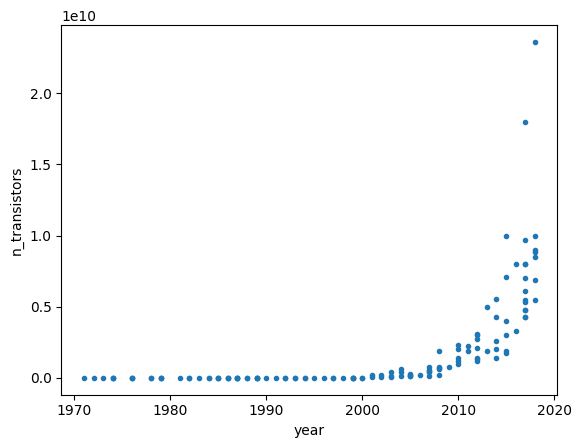

In [42]:
plt.plot(data['year'],data['n_transistors'], '.')
plt.xlabel('year')
plt.ylabel('n_transistors')
plt.show()

Un modèle linéaire est-il opportun ?

Non ! on voit clairement que le graphe suit plutot un modèle exponentiel mais nous allons tout de même prouver que le modèle linéaire ne convient pas.

# Droite de régression linéaire de y en x

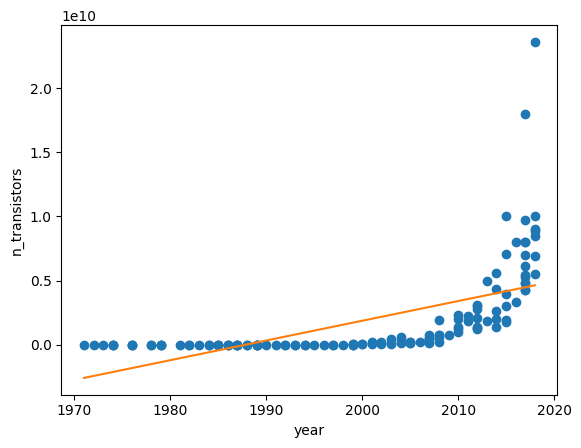

In [43]:
a_modele_lineaire = data.cov()['year']['n_transistors']/data.cov()['year']['year']
b_modele_lineaire = data['n_transistors'].mean() - a_modele_lineaire * data['year'].mean()

a_modele_lineaire, b_modele_lineaire

data['Modèle linéaire'] = a_modele_lineaire*data['year'] + b_modele_lineaire

plt.plot(data['year'], data['n_transistors'], 'o')
plt.plot(data['year'], data['Modèle linéaire'], '-')
plt.xlabel('year')
plt.ylabel('n_transistors')
plt.show()

# Résidus

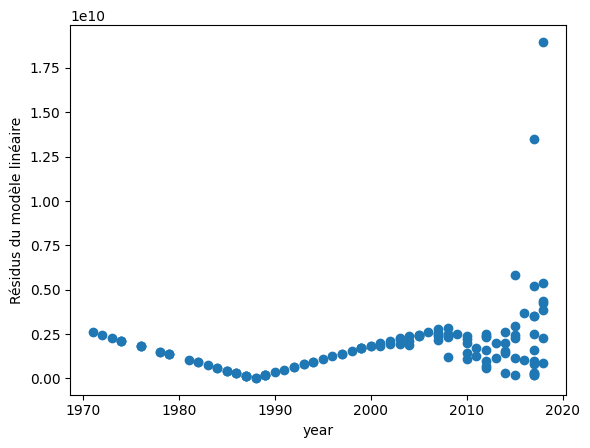

0      2.586248e+09
1      2.432638e+09
2      2.279027e+09
3      2.125417e+09
4      2.125418e+09
           ...     
124    4.242543e+09
125    8.665426e+08
126    4.366543e+09
127    2.266543e+09
128    5.366543e+09
Name: Résidus du modèle linéaire, Length: 129, dtype: float64

In [50]:
data["Résidus du modèle linéaire"] = data.apply(lambda r:np.abs(r['n_transistors']-r["Modèle linéaire"]), axis=1)
plt.plot(data['year'], data['Résidus du modèle linéaire'], 'o')
plt.xlabel('year')
plt.ylabel('Résidus du modèle linéaire')
plt.show()
data["Résidus du modèle linéaire"]

# B

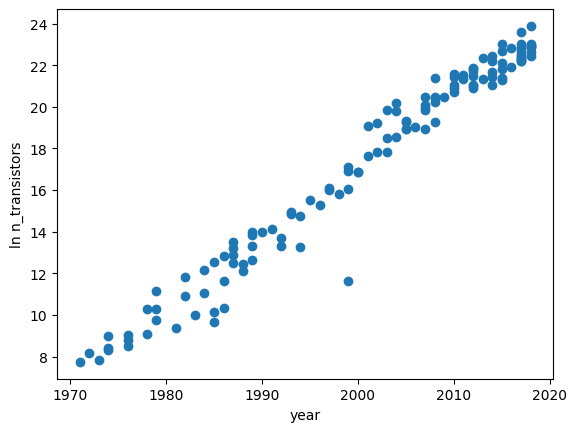

In [45]:
data['ln n_transistors'] = np.log(data['n_transistors'])

plt.plot(data['year'], data['ln n_transistors'], 'o')
plt.xlabel('year')
plt.ylabel('ln n_transistors')
plt.show()

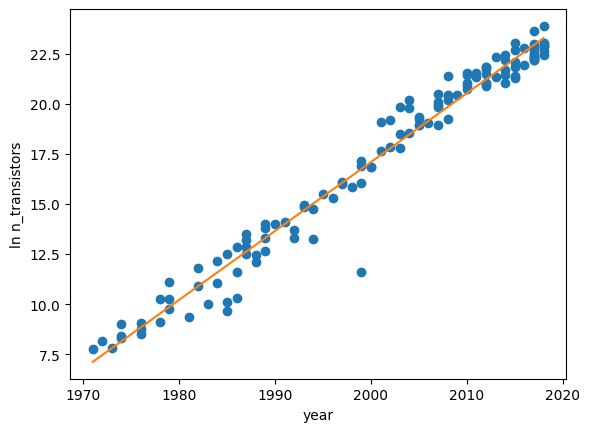

In [46]:
A = data[['year','ln n_transistors']].cov()['year']['ln n_transistors']/data[['year','ln n_transistors']].cov()['year']['year']
B = data['ln n_transistors'].mean() - A * data['year'].mean()

data['Modèle exponentiel espace linéaire'] = A * data['year'] + B

plt.plot(data['year'], data['ln n_transistors'], 'o')
plt.plot(data['year'], data['Modèle exponentiel espace linéaire'], '-')
plt.xlabel('year')
plt.ylabel('ln n_transistors')
plt.show()

Résidus modèle exponentiel dans l'espace linéaire

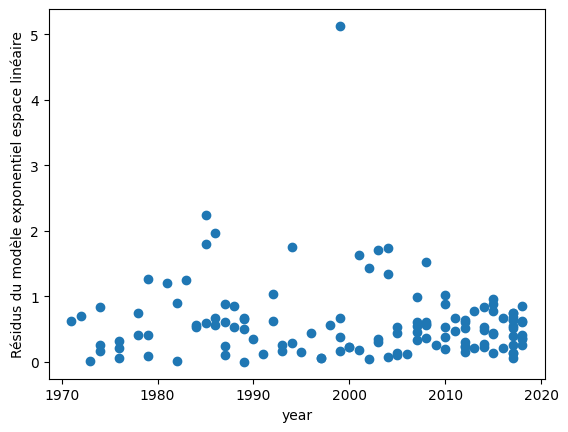

In [47]:
data["Résidus du modèle exponentiel espace linéaire"] = data.apply(lambda r:np.abs(r['ln n_transistors']-r["Modèle exponentiel espace linéaire"]), axis=1)
plt.plot(data['year'], data['Résidus du modèle exponentiel espace linéaire'], 'o')
plt.xlabel('year')
plt.ylabel('Résidus du modèle exponentiel espace linéaire')
plt.show()

Retour à l'espace exponentiel

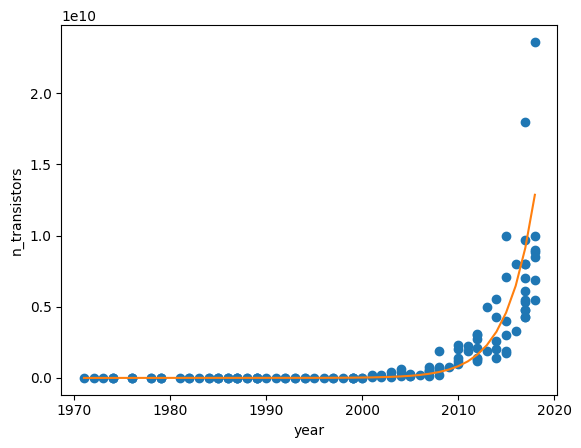

In [48]:
data['Modèle exponential'] = np.exp(data['Modèle exponentiel espace linéaire'])

plt.plot(data['year'], data['n_transistors'], 'o')
plt.plot(data['year'], data['Modèle exponential'], '-')
plt.xlabel('year')
plt.ylabel('n_transistors')
plt.show()

Résidus espace non linéaire

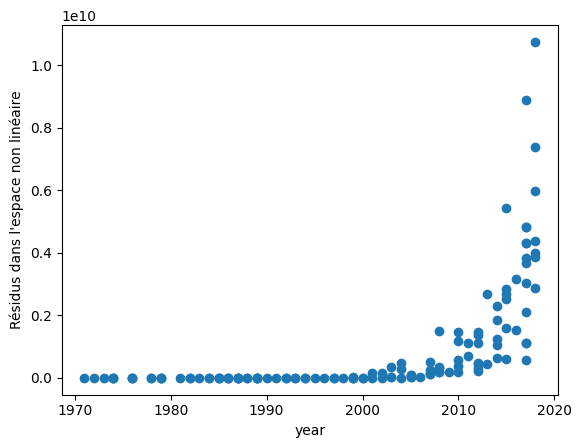

In [49]:
data["Résidus dans l'espace non linéaire"] = data.apply(lambda r:np.abs(r['n_transistors']-r['Modèle exponential']), axis=1)

plt.plot(data['year'], data["Résidus dans l'espace non linéaire"], 'o')
plt.xlabel('year')
plt.ylabel("Résidus dans l'espace non linéaire")
plt.show()